<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction-:-a-visual-intuition-of-activation-functions" data-toc-modified-id="Introduction-:-a-visual-intuition-of-activation-functions-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction : a visual intuition of activation functions</a></span></li><li><span><a href="#Build-an-MLP-to-classify-MNIST-images" data-toc-modified-id="Build-an-MLP-to-classify-MNIST-images-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Build an MLP to classify MNIST images</a></span></li></ul></div>

# Introduction to the Multi Layer Perceptron

## Introduction : a visual intuition of activation functions

Using a regression task on the sinus function, we'll try to get an intuition of the effect of activation functions.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import EarlyStopping

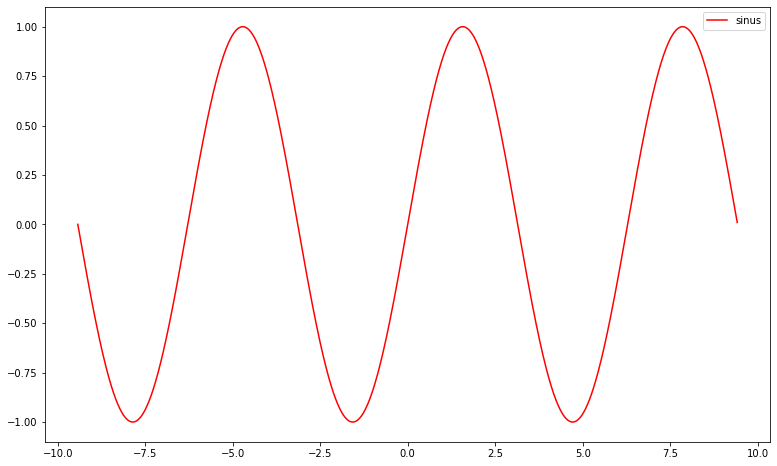

In [4]:
X = np.arange(-3*np.pi,3*np.pi,0.01)
y = np.sin(X)

plt.figure(figsize=(13,8))
plt.plot(X, y, label='sinus', color='red')
plt.legend()
plt.show()

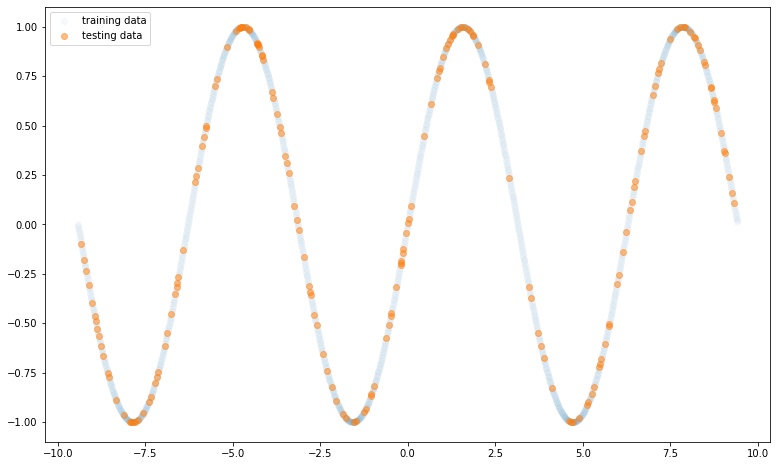

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

plt.figure(figsize=(13,8))
plt.scatter(X_train, y_train, alpha = 0.03, label='training data')
plt.scatter(X_test, y_test,alpha=0.5,label='testing data')

plt.legend()
plt.show()

$$[TODO - Students]$$

* Build a model with 1 hidden layer in 1 dimension and train it on x_train, y_train.
* What activation should we use for ouput layer ?
* What loss should we use ?

* Try different activations for the hidden layer and plot the predictions obtained on x_test
* Plot also a learning curve

In [9]:
inputs = Input(shape=(1,), name="inputs")

# One hidden layer with 1 neuron
x_sig = Dense(1, activation="sigmoid", name="layer_1")(inputs)
out_sig = Dense(1, activation="linear", name="output")(x_sig)

model = Model(inputs, out_sig)

model.compile(loss="mse", optimizer="adam")

model.summary()

history = model.fit(X_train, y_train, epochs=100, validation_split=0.33)

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 1)]               0         
                                                                 
 layer_1 (Dense)             (None, 1)                 2         
                                                                 
 output (Dense)              (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
36/36 [==============================] - 1s 7ms/step - loss: 0.5007 - val_loss: 0.5218
Epoch 2/100
36/36 [==============================] - 0s 3ms/step - loss: 0.4910 - val_loss: 0.5096
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.4843 - val_loss: 0.5027
Epoch 4/100
36/36 [===============

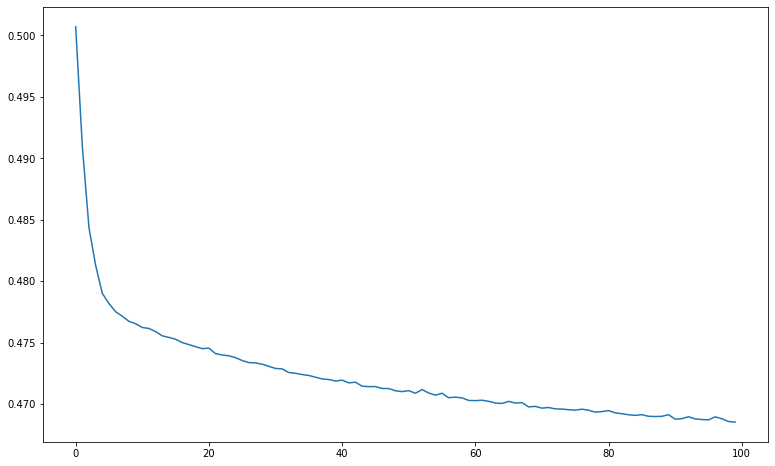

In [10]:
# Plot leaning cuve
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'])
plt.show()

In [11]:
def plot_prediction(title, model):
    y_hat_test = model.predict(X_test)

    plt.figure()
    plt.scatter(X_test, y_test, label = 'ground_truth', alpha=0.1)
    plt.scatter(X_test, y_hat_test, label = 'predicted', alpha=0.5)
    plt.legend()
    
    plt.title(title)
    plt.show()

6/6 [==============================] - 0s 2ms/step


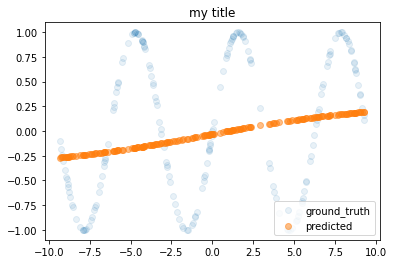

In [12]:
plot_prediction("my title", model)

$$[TODO - Students]$$

Try adding layers and increasing the layers dimension to better fit the test data. You can use the following function to quickly build your models.

* Try different n_layers (for example 1, 10, 100)
* Try different hidden_dim (for example 32, 128, 256, 512)
* Try different bach size
* Try to understand the `patience` parameters of early stopping

In [14]:
def build_sin_regression(activation, n_layers, hidden_dim):
    input = Input(shape=(1,), name='input')

    for i in range(n_layers):
      if i==0:
        x = Dense(input_shape=(1,), units=hidden_dim, activation=activation, name='layer_'+str(i))(input)
      else:
        x = Dense(units=hidden_dim, activation=activation, name='layer_'+str(i))(x)

    output = Dense(1, activation='linear', name='output')(x)
    model = Model(input, output, name = 'sinus_regression')
    return model

In [17]:
n_layers_val = [1, 10, 100]
hidden_dim_val = [32, 128, 256, 512]
batch_size_val = [16, 24]

In [18]:
model = build_sin_regression(activation = 'sigmoid', n_layers = n_layers_val[1], hidden_dim = hidden_dim_val[1])
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sinus_regression"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 1)]               0         
                                                                 
 layer_0 (Dense)             (None, 128)               256       
                                                                 
 layer_1 (Dense)             (None, 128)               16512     
                                                                 
 layer_2 (Dense)             (None, 128)               16512     
                                                                 
 layer_3 (Dense)             (None, 128)               16512     
                                                                 
 layer_4 (Dense)             (None, 128)               16512     
                                                                 
 layer_5 (Dense)             (None, 128)          

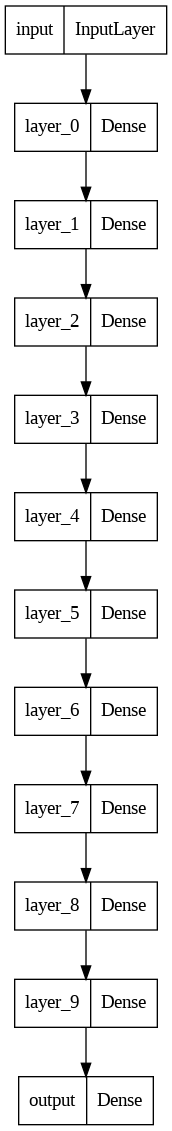

In [19]:
plot_model(model)

In [20]:
callbacks_list = [EarlyStopping(monitor='val_loss', min_delta=0.005, patience=20, verbose=2, mode='min', restore_best_weights=True)
                 ]

history = model.fit(X_train, y_train, validation_split = 0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
48/48 [==============================] - 1s 9ms/step - loss: 0.5358 - val_loss: 0.5288
Epoch 2/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5142 - val_loss: 0.5532
Epoch 3/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5085 - val_loss: 0.5513
Epoch 4/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5110 - val_loss: 0.5470
Epoch 5/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5041 - val_loss: 0.5317
Epoch 6/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5123 - val_loss: 0.5327
Epoch 7/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5045 - val_loss: 0.5297
Epoch 8/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5023 - val_loss: 0.5878
Epoch 9/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5086 - val_loss: 0.5285
Epoch 10/20
48/48 [==============================] - 0s 5ms/step - loss: 0.5030 - val_loss: 0.5397
Epoch 11/20
48/48 [

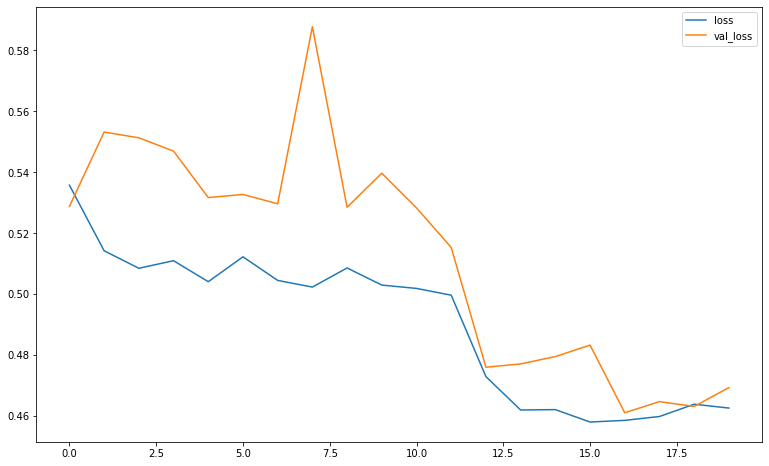

In [21]:
plt.figure(figsize=(13,8))
plt.plot(history.history['loss'], label="loss")
plt.plot(history.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

6/6 [==============================] - 0s 4ms/step


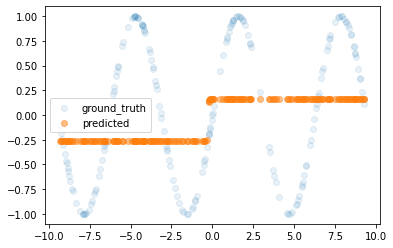

In [22]:
y_hat_test = model.predict(X_test)

plt.scatter(X_test, y_test,label = 'ground_truth', alpha=0.1)
plt.scatter(X_test, y_hat_test,label = 'predicted', alpha=0.5)

plt.legend()
plt.show()

## Build an MLP to classify MNIST images

Every MNIST data point has two parts: an image of a handwritten digit and a corresponding label. We’ll call the images “x” and the labels “y”. Both the training set and test set contain images and their corresponding labels; for example, the training images are mnist.train.images and the training labels are mnist.train.labels.

In [70]:
# Load dataset
from tensorflow.keras.datasets import mnist

# the data, shuffled and split between a train and test sets 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [71]:
# Reshape the image from 3d to 2d (nb_items, other dime)
X_train = X_train.reshape(60000, 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [72]:
# Normalize the data (input between 0 and 1)
X_train = X_train/255
X_test = X_test/255

In [73]:
X_train.shape

(60000, 784)

In [74]:
# One hot encode the label
from sklearn.preprocessing import OneHotEncoder

# Create an instance of the OneHotEncoder
encoder = OneHotEncoder()

# Fit and transform the training labels
y_train_encoded = encoder.fit_transform(y_train.reshape(-1, 1))

# Transform the test labels
y_test_encoded = encoder.transform(y_test.reshape(-1, 1))
y_test_encoded = y_test_encoded.toarray()

In [75]:
# Buid MLP model
# You can use the following function
def build_MLP(input_shape, activation, layers, nb_class):
    input = Input(shape=(input_shape,), name='input')

    for i, hidden_size in enumerate(layers):
        if i == 0:
            x = Dense(input_shape=(input_shape,), units=hidden_size, activation=activation, name='layer_'+str(i))(input)
        else:
            x = Dense(units=hidden_size, activation=activation, name='layer_'+str(i))(x)

    output = Dense(nb_class, activation='softmax', name='output')(x)
    model = Model(input, output, name = 'mnist_classifier')
    model.summary()
    return model


input_shape = 784
activation = 'relu'
layers = [64, 32, 16]
nb_class = 10


model = build_MLP(input_shape, activation, layers, nb_class)

Model: "mnist_classifier"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input (InputLayer)          [(None, 784)]             0         
                                                                 
 layer_0 (Dense)             (None, 64)                50240     
                                                                 
 layer_1 (Dense)             (None, 32)                2080      
                                                                 
 layer_2 (Dense)             (None, 16)                528       
                                                                 
 output (Dense)              (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________


In [76]:
# Compile and fit the model
callbacks_list = [EarlyStopping(monitor='val_accuracy', min_delta=0.005, patience=20,
                                verbose=2, mode='min', restore_best_weights=True)
                 ]

model.compile(loss='categorical_crossentropy', metrics=["accuracy"], optimizer='adam')
y_train_encoded = y_train_encoded.toarray()

history = model.fit(X_train, y_train_encoded, validation_split=0.1, callbacks=callbacks_list, batch_size=32, epochs=20)

Epoch 1/20
1688/1688 [==============================] - 8s 4ms/step - loss: 0.3528 - accuracy: 0.8957 - val_loss: 0.1426 - val_accuracy: 0.9573
Epoch 2/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.1480 - accuracy: 0.9555 - val_loss: 0.1396 - val_accuracy: 0.9580
Epoch 3/20
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1093 - accuracy: 0.9664 - val_loss: 0.0971 - val_accuracy: 0.9685
Epoch 4/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0866 - accuracy: 0.9738 - val_loss: 0.0984 - val_accuracy: 0.9715
Epoch 5/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0727 - accuracy: 0.9768 - val_loss: 0.0869 - val_accuracy: 0.9758
Epoch 6/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0604 - accuracy: 0.9813 - val_loss: 0.0974 - val_accuracy: 0.9712
Epoch 7/20
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0526 - accuracy: 0.9830 - val_loss: 0.0906 - val_accuracy:

In [77]:
y_train.shape

(60000,)

In [78]:
# Print history keys
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

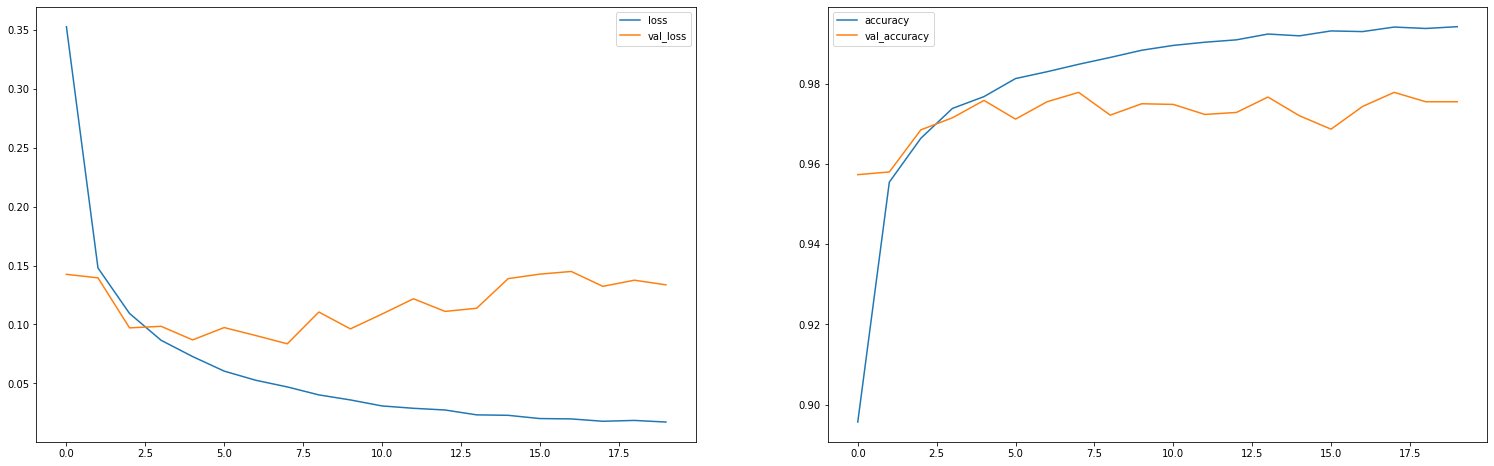

In [79]:
# Babysit your model
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(26,8))

ax1.plot(history.history['loss'], label="loss")
ax1.plot(history.history['val_loss'], label="val_loss")
ax1.legend()
ax2.plot(history.history['accuracy'], label="accuracy")
ax2.plot(history.history['val_accuracy'], label="val_accuracy")
ax2.legend()
plt.show()

In [80]:
# Evaluate the model
score = model.evaluate(X_test, y_test_encoded)
print('Test loss:', score[0])
print('Test accuracy', score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1386 - accuracy: 0.9731
Test loss: 0.13860878348350525
Test accuracy 0.9731000065803528


In [81]:
# Modify the network in order to obtain better accuracy (better than 0.96)